# Códigos Tidene - Visualizações

In [8]:
### instalar os pacotes 
#sudo apt-get install libpython3-dev
# pillow, numpy, anaconda - pip install 
# depois no env conda install -c https://conda.anaconda.org/conda-forge wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS 
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import random
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from nltk import download
download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import *    #https://www.nltk.org/api/nltk.tokenize.html

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer("[a-zA-Z']+")
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in self.tokenizer.tokenize(doc) if (len(t)>2)]

class StemTokenizer(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer("[a-zA-Z']+")
    def __call__(self, doc):
        
        return [self.stemmer.stem(t) for t in self.tokenizer.tokenize(doc) if (len(t)>2)]


# Visualização com wordcloud

In [43]:
# dados que serão visualizados
textos = pd.read_csv('data/train_min.csv',encoding='utf8')['review']
# escolhendo um texto para ser visualizado
texto = BeautifulSoup(textos[1], "html.parser").get_text().split()
texto = [w for w in texto if len(w) > 2]
texto = str(texto)

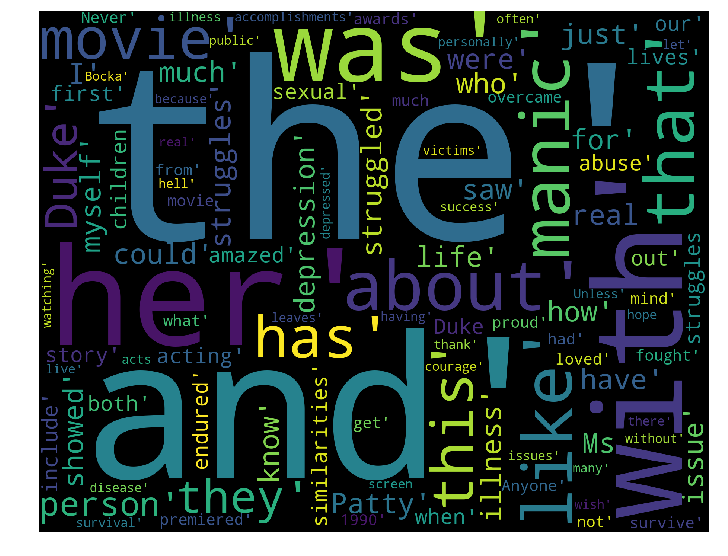

In [44]:
#https://github.com/amueller

width = 12
height = 12
plt.figure(figsize=(width, height))
wordcloud = WordCloud(width=1800,height=1400).generate(texto)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()